In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Buscar o dataset
iris = fetch_ucirepo(id=53)

# Converter em DataFrame
X = iris.data.features
y = iris.data.targets
df = pd.concat([X, y], axis=1)

In [2]:
print(X.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [3]:
print(y.value_counts())

class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [4]:
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


In [5]:
# Verificar registros duplicados e remover esses
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df = df.drop_duplicates()

Número de registros duplicados: 3


In [6]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#Separação de atributos (X) e variável alvo (y)
X = df.drop("class", axis=1)
y = df["class"]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

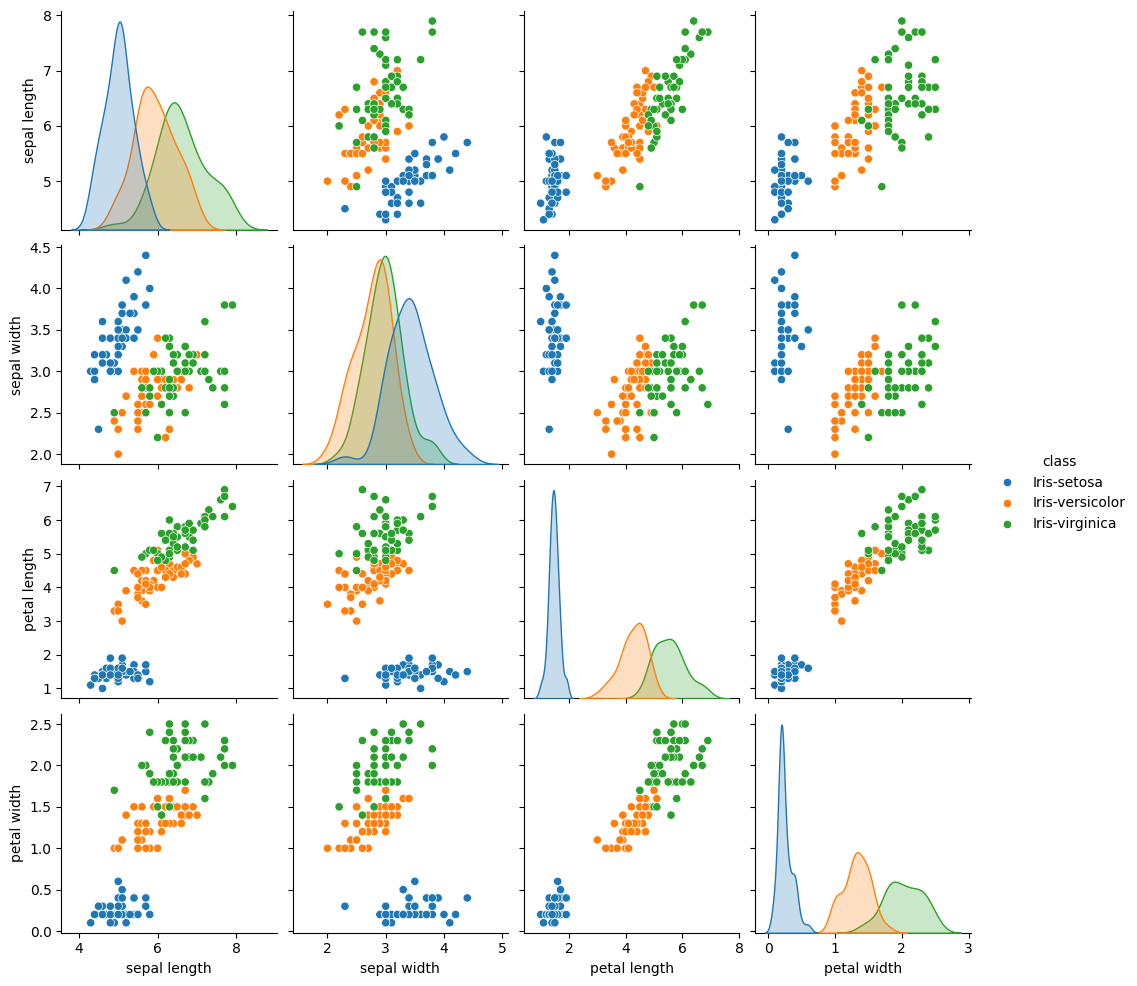

In [9]:
sns.pairplot(pd.concat([X, y], axis=1), hue='class')
plt.show()

In [14]:
# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Acurácia: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



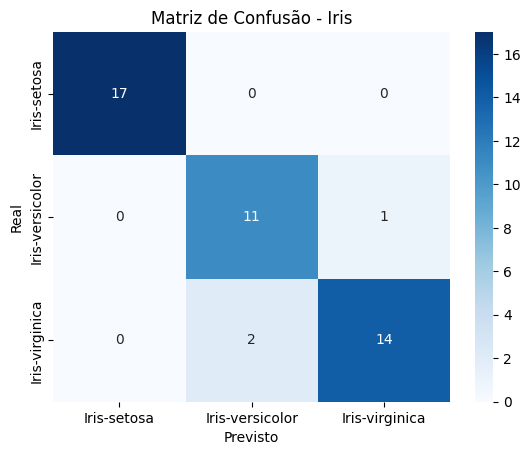

In [17]:
# Avaliar
y_pred = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_ 

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão - Iris")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
print("Acurácias por fold:", scores)
print("Média:", scores.mean())

Acurácias por fold: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.92857143 1.         1.        ]
Média: 0.9528571428571428
